# Salary prediction using Linear Regression 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [78]:
df = pd.read_csv('SalaryData.csv')
df

,YoE,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
6699,20.0,200000.0
6700,3.0,50000.0
6701,4.0,55000.0
6702,14.0,140000.0


In [79]:
df = df[df['YoE'] < 20]

In [80]:
df.shape

(6396, 2)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6396 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YoE     6396 non-null   float64
 1   Salary  6394 non-null   float64
dtypes: float64(2)
memory usage: 149.9 KB


In [82]:
df = df.dropna()

x = df[['YoE']]
y = df['Salary']


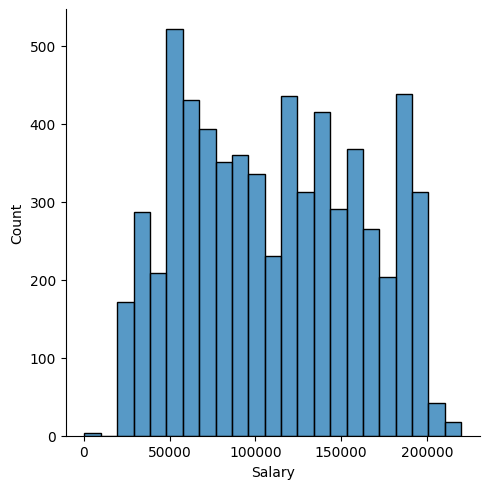

In [83]:
sns.displot(df['Salary'])

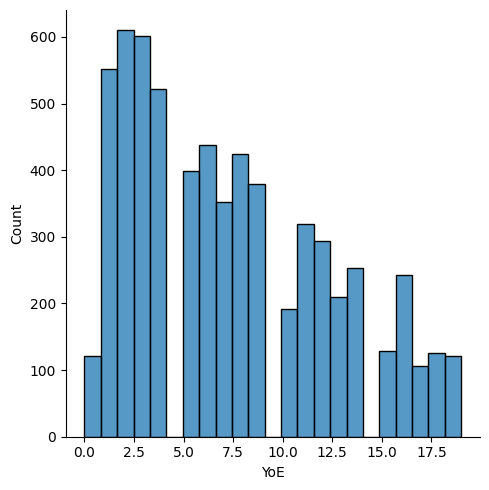

In [84]:
sns.displot(df['YoE'])

In [85]:
df.corr()

,YoE,Salary
YoE,1.000000,0.829128
Salary,0.829128,1.000000


In [86]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=25)

In [88]:
from sklearn.linear_model import LinearRegression

LinReg  = LinearRegression()
LinReg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
y_pred = LinReg.predict(x_test)
y_pred
# Predicted value from Linear regression mode


array([100599.22683443,  75303.56399032, 117463.00206384, ...,
        75303.56399032,  75303.56399032, 142758.66490795], shape=(1279,))

In [90]:
y_test
# actual value

430     155000.0
5536     60000.0
3704     85000.0
867     180000.0
3492     70000.0
          ...   
1725     90000.0
3451     45000.0
5812     80000.0
1739     85000.0
1509    170000.0
Name: Salary, Length: 1279, dtype: float64

In [91]:
LinReg.predict([[2.5],[3],[10],[7.5],[0]])

array([ 71087.62018297,  75303.56399032, 134326.77729325, 113247.05825649,
        50007.90114621])

<Axes: xlabel='YoE', ylabel='Salary'>

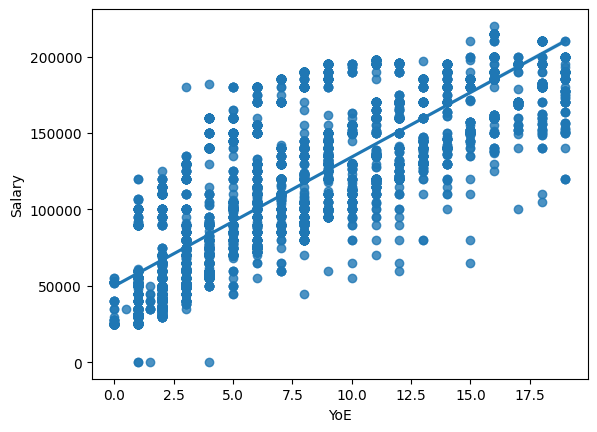

In [92]:
sns.regplot(x = df['YoE'], y=df['Salary'] )

In [93]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.689287423959406

In [95]:
coeff = LinReg.coef_
coeff

array([8431.8876147])

In [96]:
intercept = LinReg.intercept_
intercept

np.float64(50007.90114621135)

If we take Y = mX + C
So here Y = Salary and X = YoE
from above model we found value for m(Coeff) and C(intercept)

we can say Freshers, salary is getting around 50007 and it linearly can be calculated from above model

If we calculate approx salary of 5 YoE, we calculate as follow

In [99]:
#Salary = coeff * YoE + intercept
SalaryFromModel = coeff * 5 + intercept
SalaryFromModel

array([92167.33921973])

So the average salary for 5 YoE will be around $ 92167.33